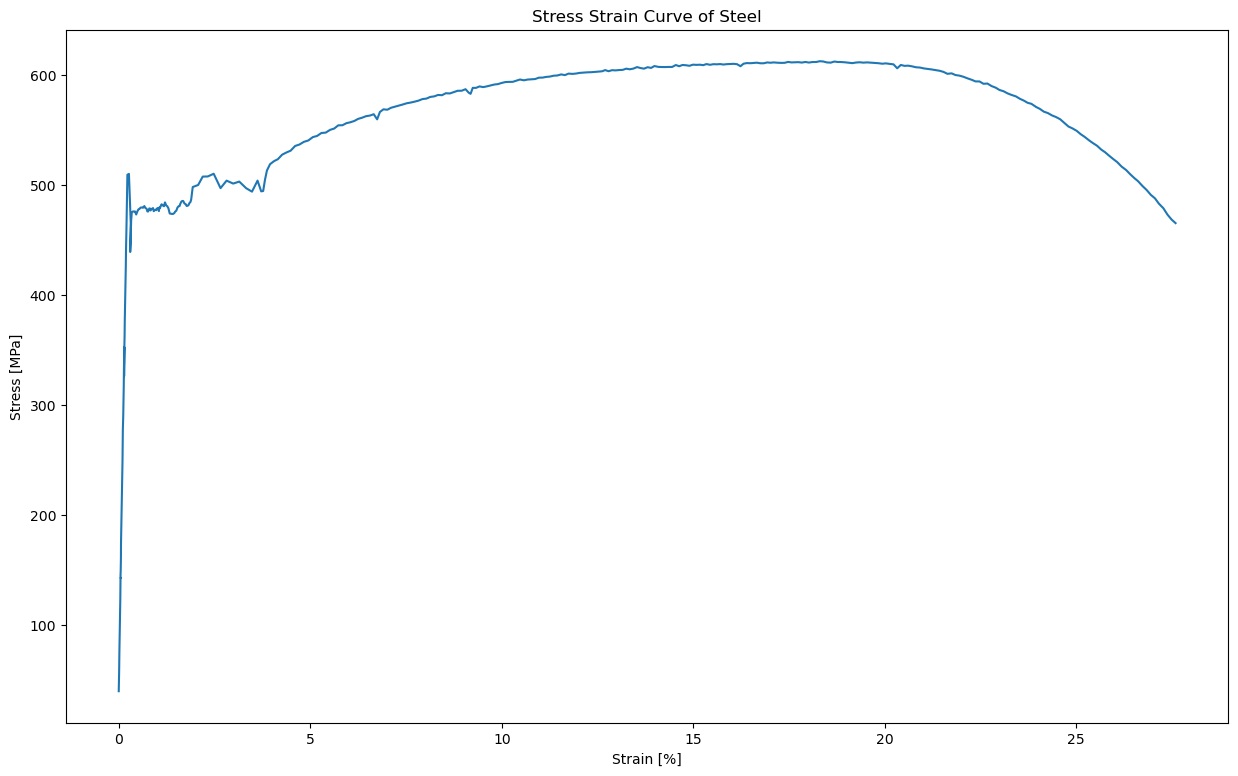

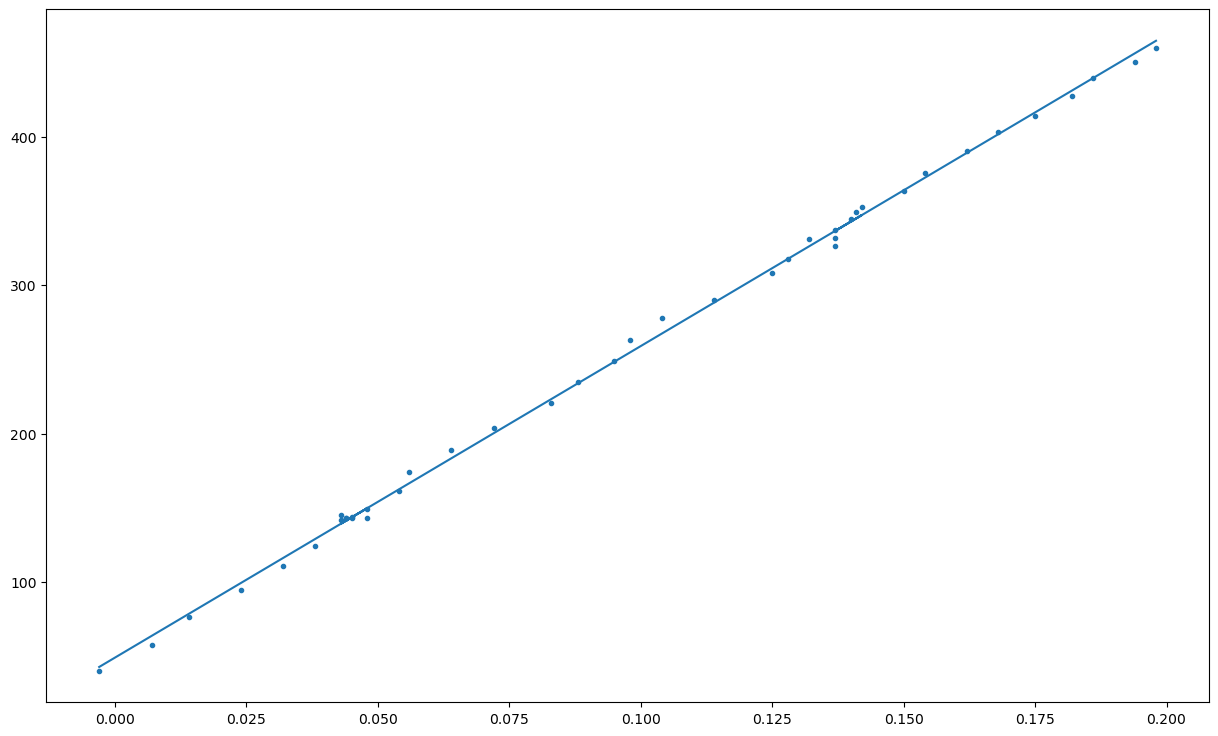

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

df = pd.read_excel('./Results_traction_1223.xlsx')

def calcStress(loads, area):
    stresses = []
    for load in loads:
        stress = round(load/area, 2)
        stresses.append(stress)
    return stresses

def calcStrain(deformations, length):
    strains = []
    for deformation in deformations:
        strain = round((deformation/length)*100, 3)
        strains.append(strain)
    return strains

#Stress vs Strain
def stressStrainCurve(area, length):
    df['Stress [MPa]'] = calcStress(df['Load [ N ]'], area)
    df['Strain [%]'] = calcStrain(df['Deformation [ mm ]'], length)
    plt.figure(figsize=(15,9))
    plt.plot(df['Strain [%]'], df['Stress [MPa]'])
    plt.xlabel('Strain [%]')
    plt.ylabel('Stress [MPa]')
    plt.title('Stress Strain Curve of Steel')
    plt.show()    

#Young's Modulus
def youngsModulus():
    stressStrainCurve(50.3, 50)
    linearMax = 0
    for strain in df['Strain [%]']:
        if not strain < 0.2:
            linearMax = df.loc[(df == strain).any(axis=1)].index[0]
            break                 
    x = df['Strain [%]'].head(linearMax)
    y = df['Stress [MPa]'].head(linearMax)
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    def calcY(x):
        return slope * x + intercept
    mymodel = list(map(calcY, x))
    plt.figure(figsize=(15,9))
    plt.scatter(x, y, marker='.')
    plt.plot(x, mymodel)
    plt.show()
youngsModulus()
